In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from BrainTumor.subjects import Subjects
from BrainTumor.ignition_utils import *
from BrainTumor.metastability_utils import *
from BrainTumor.plotting_helper import lmplot, boxplot

data_dir = "../../data"

subjects = Subjects()
subjects.initialize(data_dir)

control_subset = subjects.get_control_subset()
tumor_subset = subjects.get_tumor_subset()

ignitions = compute_ignitions(subjects)

kuramoto_metastabilities = compute_metastability(subjects)
ignition_std_mevokedinteg_metastabilities = {
    k: np.std(v.mevokedinteg) for k, v in ignitions.items()
}
ignition_std_stdevokedinteg_metastabilities = {
    k: np.std(v.stdevokedinteg) for k, v in ignitions.items()
}
ignition_mean_stdevokedinteg_metastabilities = {
    k: np.mean(v.stdevokedinteg) for k, v in ignitions.items()
}

Let's check how similar are "different" global metastabilities.

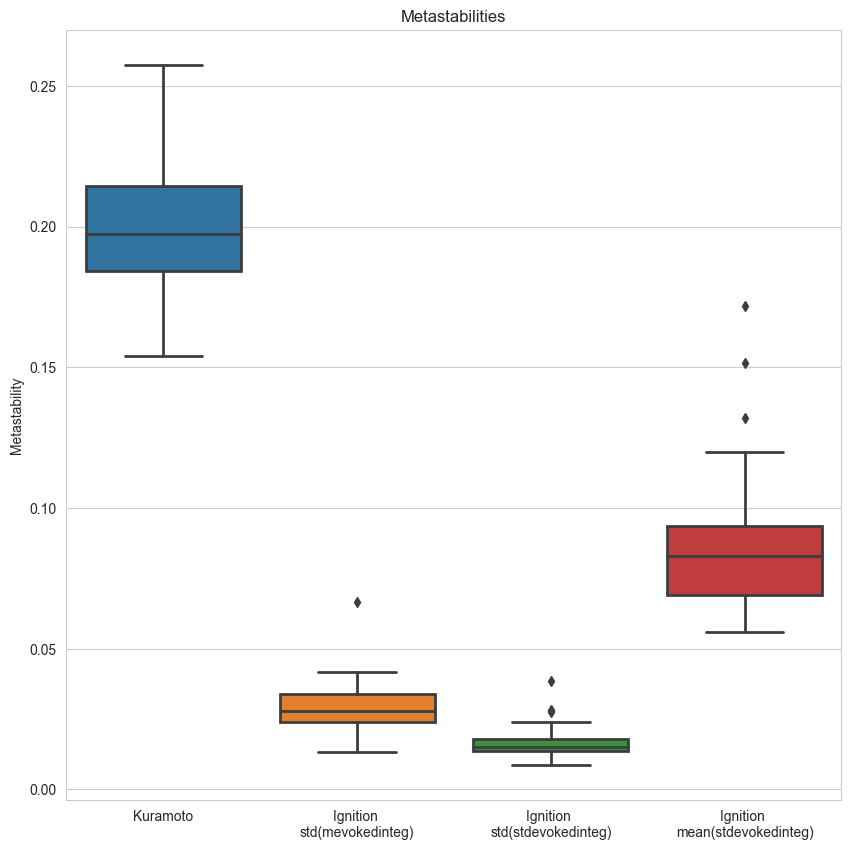

In [3]:
data = {
    'Kuramoto': [v.metastability for _, v in kuramoto_metastabilities.items()],
    'Ignition std(mevokedinteg)': [v for _, v in ignition_std_mevokedinteg_metastabilities.items()],
    'Ignition std(stdevokedinteg)': [v for _, v in ignition_std_stdevokedinteg_metastabilities.items()],
    'Ignition mean(stdevokedinteg)': [v for _, v in ignition_mean_stdevokedinteg_metastabilities.items()],
}

boxplot(
    data={
        'Kuramoto': [v.metastability for _, v in kuramoto_metastabilities.items()],
        'Ignition \nstd(mevokedinteg)': [v for _, v in ignition_std_mevokedinteg_metastabilities.items()],
        'Ignition \nstd(stdevokedinteg)': [v for _, v in ignition_std_stdevokedinteg_metastabilities.items()],
        'Ignition \nmean(stdevokedinteg)': [v for _, v in ignition_mean_stdevokedinteg_metastabilities.items()],
    },
    title="Metastabilities",
    fig_size=(10,10),
    y_label="Metastability",
)

And correlation between kuramoto metastability vs ignition

<Figure size 1000x1000 with 0 Axes>

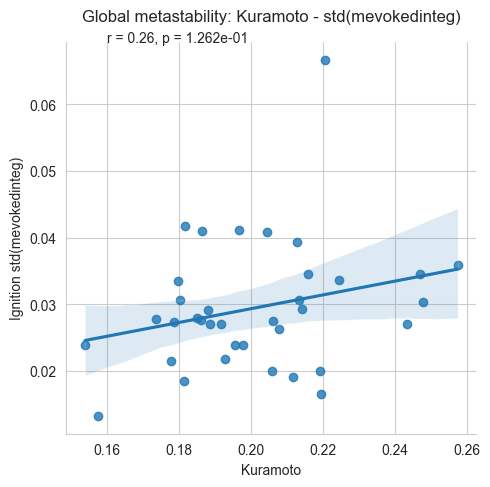

<Figure size 1000x1000 with 0 Axes>

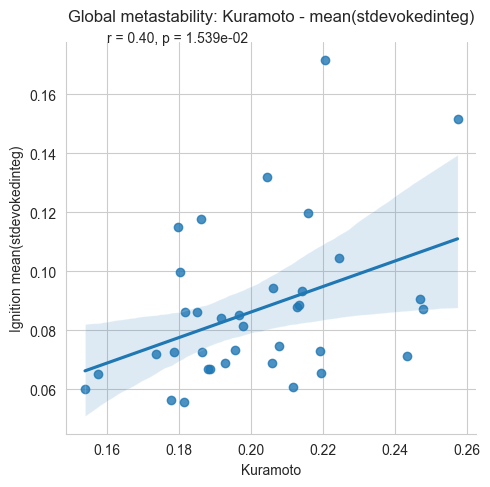

<Figure size 1000x1000 with 0 Axes>

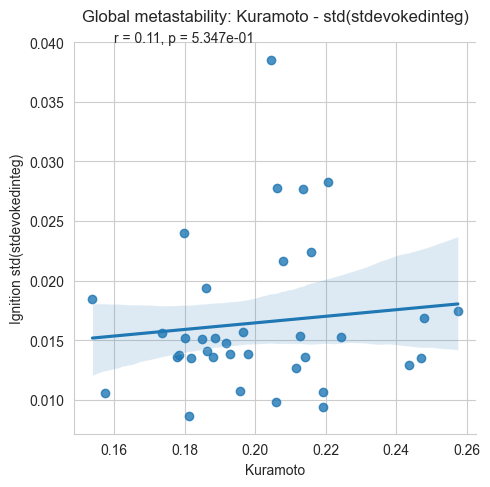

In [4]:
lmplot(
    data={
        'Kuramoto': data['Kuramoto'],
        'Ignition std(mevokedinteg)': data['Ignition std(mevokedinteg)']
    },
    title="Global metastability: Kuramoto - std(mevokedinteg)"
)

lmplot(
    data={
        'Kuramoto': data['Kuramoto'],
        'Ignition mean(stdevokedinteg)': data['Ignition mean(stdevokedinteg)']
    },
    title="Global metastability: Kuramoto - mean(stdevokedinteg)"
)

lmplot(
    data={
        'Kuramoto': data['Kuramoto'],
        'Ignition std(stdevokedinteg)': data['Ignition std(stdevokedinteg)']
    },
    title="Global metastability: Kuramoto - std(stdevokedinteg)"
)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.777e-02 U_stat=8.700e+01
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.030e-01 U_stat=8.700e+01


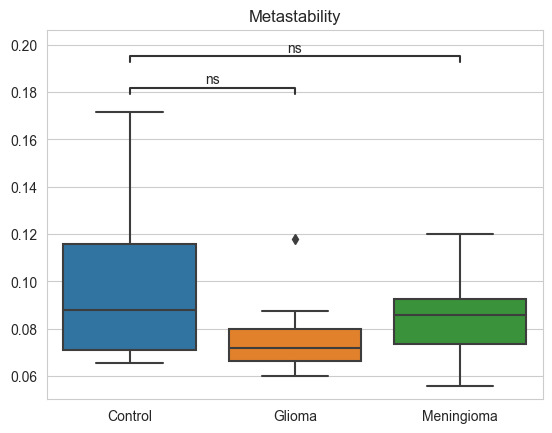

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. >= 15cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.687e-02 U_stat=9.000e+01


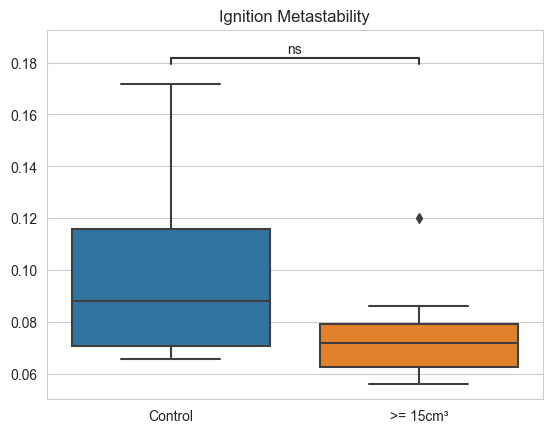

In [5]:
plotComparisonAcrossLabels2(
    {
        'Control': [v for k, v in subjects.get_control_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        'Glioma': [v for k, v in subjects.get_glioma_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        'Meningioma': [v for k, v in subjects.get_meningioma_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
    },
    graphLabel='Metastability',
    pairs=[('Control', 'Glioma'), ('Control', 'Meningioma')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v for k, v in subjects.get_control_subset().keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
        '>= 15cm³': [v for k, v in subjects.get_plus_x_cm3_subset(15.0).keep_only_from_this_set(ignition_mean_stdevokedinteg_metastabilities).items()],
    },
    graphLabel='Ignition Metastability',
    pairs=[('Control', '>= 15cm³')]
)